<a href="https://colab.research.google.com/github/KARTIKEEKULKARNI/KARTIKEEKULKARNI/blob/main/Copy_of_Fraudulent_Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing all the tools needed
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import xgboost

In [ ]:
# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

In [ ]:
df = pd.read_csv("/Fraud.csv")

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3546649,260,PAYMENT,7829.76,C28616592,22116.00,14286.24,M1321576916,0.0,0.0,0.0,0.0
3546650,260,PAYMENT,10792.26,C697109667,14286.24,3493.98,M1786562305,0.0,0.0,0.0,0.0
3546651,260,PAYMENT,6796.17,C1313895929,824941.00,818144.83,M758709998,0.0,0.0,0.0,0.0
3546652,260,CASH_IN,131307.53,C1821448190,11383.00,142690.53,C1998046670,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(3546654, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709657 entries, 0 to 709656
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            709657 non-null  int64  
 1   type            709657 non-null  object 
 2   amount          709657 non-null  float64
 3   nameOrig        709657 non-null  object 
 4   oldbalanceOrg   709657 non-null  float64
 5   newbalanceOrig  709657 non-null  float64
 6   nameDest        709657 non-null  object 
 7   oldbalanceDest  709657 non-null  float64
 8   newbalanceDest  709657 non-null  float64
 9   isFraud         709656 non-null  float64
 10  isFlaggedFraud  709656 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 59.6+ MB


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,709657.000000,7.096570e+05,7.096570e+05,7.096570e+05,7.096570e+05,7.096570e+05,709656.000000,709656.0
mean,18.620418,1.635239e+05,8.738904e+05,8.940075e+05,9.806711e+05,1.138697e+06,0.000590,0.0
std,8.727004,2.698629e+05,2.936368e+06,2.973274e+06,2.319956e+06,2.465756e+06,0.024292,0.0
min,1.000000,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,12.000000,1.286324e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,17.000000,7.823494e+04,1.669100e+04,0.000000e+00,1.195101e+05,2.164216e+05,0.000000,0.0
75%,20.000000,2.185962e+05,1.496420e+05,1.898839e+05,9.049607e+05,1.177702e+06,0.000000,0.0
max,37.000000,1.000000e+07,3.893942e+07,3.894623e+07,4.148270e+07,4.148270e+07,1.000000,0.0


In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           1
isFlaggedFraud    1
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isFraud.value_counts()

0.0    709237
1.0       419
Name: isFraud, dtype: int64

In [ ]:
df.isFlaggedFraud.value_counts()

0.0    709656
Name: isFlaggedFraud, dtype: int64

In [ ]:
pd.crosstab(df.isFraud, df.isFlaggedFraud)

isFlaggedFraud,0.0
isFraud,
0.0,709237
1.0,419


<ipython-input-16-3fdc3b44c1a1>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)


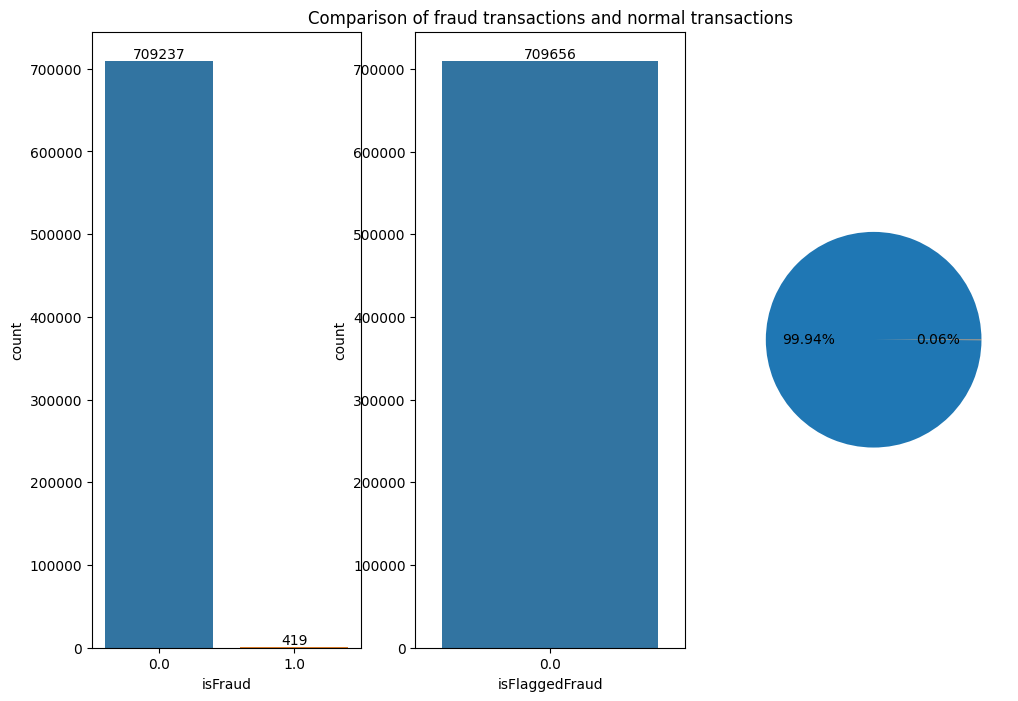

In [ ]:
# Let's visualize this

ax, figure = plt.subplots(figsize = (16, 8))

plt.subplot(141)
ax = sns.countplot(x=df['isFraud'])
ax.bar_label(ax.containers[0])

plt.subplot(142)
ax = sns.countplot(x=df['isFlaggedFraud'])
ax.bar_label(ax.containers[0])

plt.subplot(143)
plt.pie(df['isFraud'].value_counts(),  autopct='%.2f%%')

ax.set_title("Comparison of fraud transactions and normal transactions", loc = "center")
plt.show()

In [ ]:
df[df['isFlaggedFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [ ]:
# Let's check the payment method count
df["type"].value_counts()

CASH_OUT    254217
PAYMENT     237820
CASH_IN     154179
TRANSFER     58427
DEBIT         5014
Name: type, dtype: int64

In [ ]:
pd.crosstab(df.type, df.isFraud)

isFraud,0.0,1.0
type,,
CASH_IN,154179,0
CASH_OUT,254001,216
DEBIT,5014,0
PAYMENT,237820,0
TRANSFER,58223,203


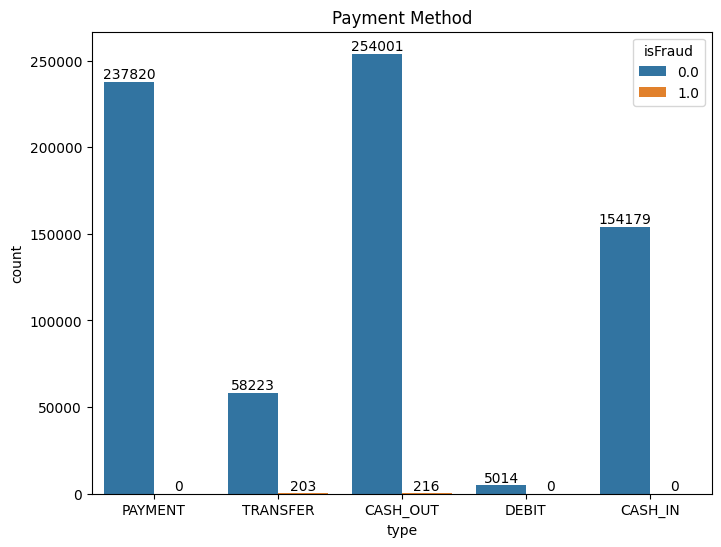

In [ ]:
# Let's see which type of payment method is most used for fradulent transactions

ax, figure = plt.subplots(figsize = (8, 6))

ax = sns.countplot(data=df, x=df['type'], hue='isFraud')
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])

plt.title('Payment Method')
plt.show()

In [ ]:
df.amount.max()

10000000.0

<ipython-input-23-86027c3404d8>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


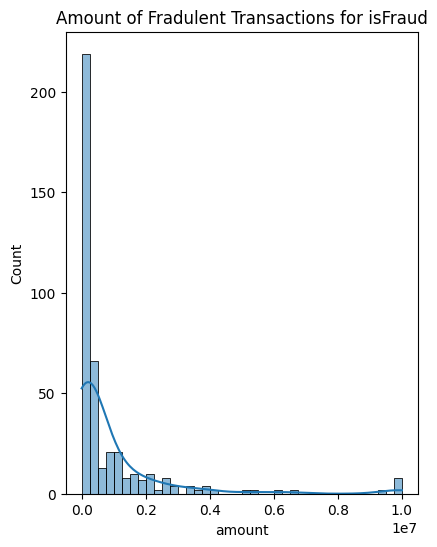

In [ ]:
ax, figure = plt.subplots(figsize = (10, 6))

plt.subplot(121)
ax = sns.histplot(data=df[df['isFraud']==1],x='amount', kde=True)
plt.title('Amount of Fradulent Transactions for isFraud')

plt.show()

In [ ]:
# Let's see the Correlation Matrix
df.corr()

<ipython-input-24-74de06aa69d3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,-0.002476,-0.013579,-0.012982,0.008511,-0.008794,0.000572,NaN
amount,-0.002476,1.000000,-0.005154,-0.007294,0.215378,0.316753,0.066848,NaN
oldbalanceOrg,-0.013579,-0.005154,1.000000,0.999196,0.092828,0.063350,0.000443,NaN
newbalanceOrig,-0.012982,-0.007294,0.999196,1.000000,0.094518,0.062969,-0.007007,NaN
oldbalanceDest,0.008511,0.215378,0.092828,0.094518,1.000000,0.973416,-0.004884,NaN
newbalanceDest,-0.008794,0.316753,0.063350,0.062969,0.973416,1.000000,-0.000965,NaN
isFraud,0.000572,0.066848,0.000443,-0.007007,-0.004884,-0.000965,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-25-9ded026055ae>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


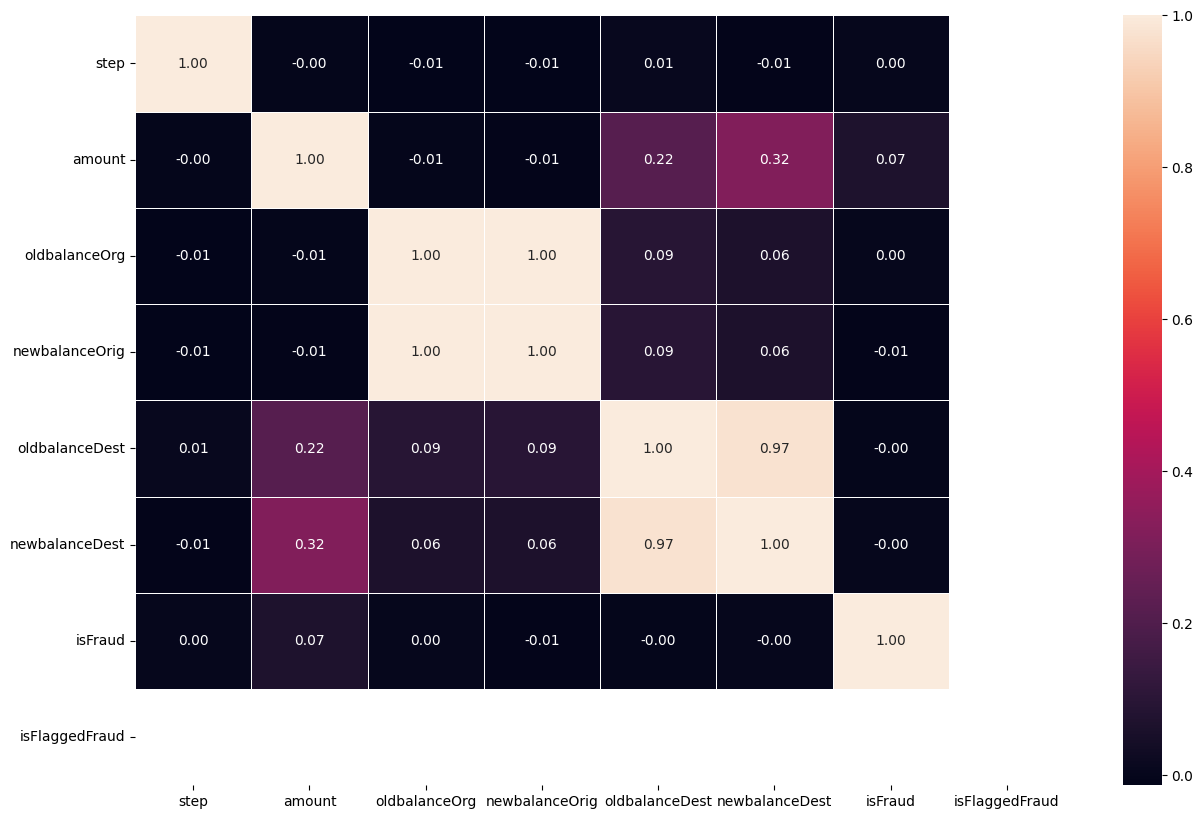

In [ ]:
# Let's make our correlation matrix more visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = ".2f");

In [ ]:
# Let's make a duplicated of the original data and remove nameOrig, nameDest

df_old = df.copy()
df_old

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
709652,37,PAYMENT,42367.73,C136424218,898.0,0.00,M1410650475,0.00,0.00,0.0,0.0
709653,37,CASH_OUT,394977.00,C1402059647,5520.0,0.00,C1390248643,538083.34,933060.34,0.0,0.0
709654,37,PAYMENT,16243.92,C1064018018,47970.0,31726.08,M983021038,0.00,0.00,0.0,0.0
709655,37,CASH_OUT,269288.40,C1215997022,17977.0,0.00,C1377477150,188122.82,457411.22,0.0,0.0


In [ ]:
df.drop(['nameOrig', 'nameDest'], axis = 1, inplace = True)
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...
709652,37,PAYMENT,42367.73,898.0,0.00,0.00,0.00,0.0,0.0
709653,37,CASH_OUT,394977.00,5520.0,0.00,538083.34,933060.34,0.0,0.0
709654,37,PAYMENT,16243.92,47970.0,31726.08,0.00,0.00,0.0,0.0
709655,37,CASH_OUT,269288.40,17977.0,0.00,188122.82,457411.22,0.0,0.0


In [ ]:
# Let's change the dtype of Payment type

le = LabelEncoder()
df["type"] = le.fit_transform(df["type"])
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.00,0.00,0.0,0.0
1,1,3,1864.28,21249.0,19384.72,0.00,0.00,0.0,0.0
2,1,4,181.00,181.0,0.00,0.00,0.00,1.0,0.0
3,1,1,181.00,181.0,0.00,21182.00,0.00,1.0,0.0
4,1,3,11668.14,41554.0,29885.86,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...
709652,37,3,42367.73,898.0,0.00,0.00,0.00,0.0,0.0
709653,37,1,394977.00,5520.0,0.00,538083.34,933060.34,0.0,0.0
709654,37,3,16243.92,47970.0,31726.08,0.00,0.00,0.0,0.0
709655,37,1,269288.40,17977.0,0.00,188122.82,457411.22,0.0,0.0


In [ ]:
# Splitting features and target data into x and y

x = df.drop("isFraud", axis = 1)
y = df["isFraud"]

# Set random seed
np.random.seed(42)

# Split data into training and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

# tranform value for valid data
x_valid = scaler.transform(x_valid)

In [ ]:
models = {"Random Forest Classifier" : RandomForestClassifier(),
          "Logistic Regression" : LogisticRegression(max_iter = 200),
          "KNeighbors Classifier" : KNeighborsClassifier(),
          "GaussianNB" : GaussianNB(),
          "XGB Classifier" : XGBClassifier()}

In [ ]:
def fit_and_score (models, x_train, x_valid, y_train, y_valid):
    """
    Fits and evaluates the given models.
    """

    # Set random seed
    np.random.seed(42)

    # Set empty dictionary
    model_scores = {}

    # Loop through models
    for names, model in models.items():

        # Fit the model
        model.fit(x_train, y_train)


        # Evaluate the model and append the score to model_scores
        model_scores[names] = model.score(x_valid, y_valid)

    return model_scores